# CS2410 Group Project
### Topic: Analyze previous year home prices in LA
##### By Katherine Le and Miranda Rendon

In [119]:
# import packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
# load datasets
prices = pd.read_csv("./datasets/MedianPricesofExistingDetachedHomesHistoricalData.csv")
timeOnMarket = pd.read_csv("./datasets/MedianTimeonMarketofExistingDetachedHomesHistoricalData.csv")
unsoldInv = pd.read_csv("./datasets/UnsoldInventoryIndexofExistingDetachedHomesHistoricalData.csv")

In [121]:
# get LA data from each set in a new df
housingData = pd.DataFrame({
    'Mon-Yr' : prices['Mon-Yr'],
    'Median Price' : prices['Los Angeles'],
    'Median Time on Market' : timeOnMarket['LA'],
    'Unsold Inventory' : unsoldInv['Los Angeles']

})

# remove incomplete 2024 data
housingData = housingData.iloc[:-8]

# clean prices data and convert to numeric
housingData['Median Price'] = housingData['Median Price'].replace({'\\$':'',',':''}, regex=True)
housingData['Median Price'] = housingData['Median Price'].astype(int)

# save cleaned data into new file
housingData.to_csv('./datasets/LAHousingData.csv', index = False)

In [122]:
# modify data frame to be sorted by year over month/year
housingDataYears = pd.read_csv('./datasets/LAHousingData.csv')

# format year column 
housingDataYears['Mon-Yr'] = housingDataYears.iloc[:,0].str[-2:]
housingDataYears['Mon-Yr'] = "19" + housingDataYears['Mon-Yr']
housingDataYears['Mon-Yr'] = housingDataYears['Mon-Yr'].astype(int)

housingDataYears.loc[housingDataYears['Mon-Yr'] < 1990, 'Mon-Yr'] += 100 

# sorts and calculates average by year
avgHousingData = housingDataYears.groupby('Mon-Yr').mean()
avgHousingData = avgHousingData.round(3)

# save averaged data into new file
avgHousingData.to_csv('./datasets/AvgLAHousingData.csv')


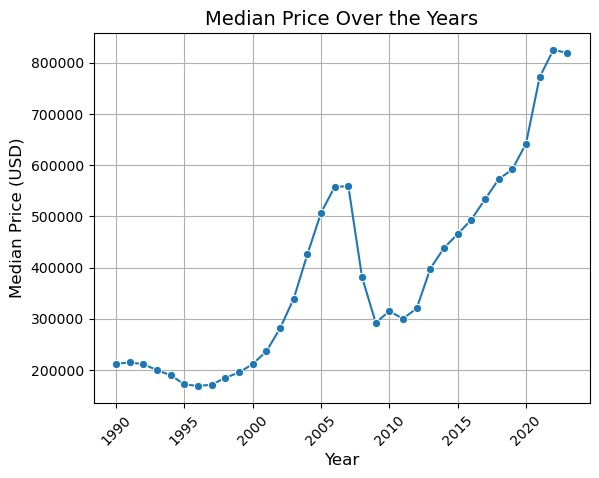

In [123]:
# create graph for median price over the years
sns.lineplot(data=avgHousingData, x='Mon-Yr', y='Median Price', marker = 'o')

plt.title('Median Price Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Price (USD)', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(True)

plt.savefig('./graphs/MedianPriceOverYears.png', bbox_inches='tight')
plt.show()

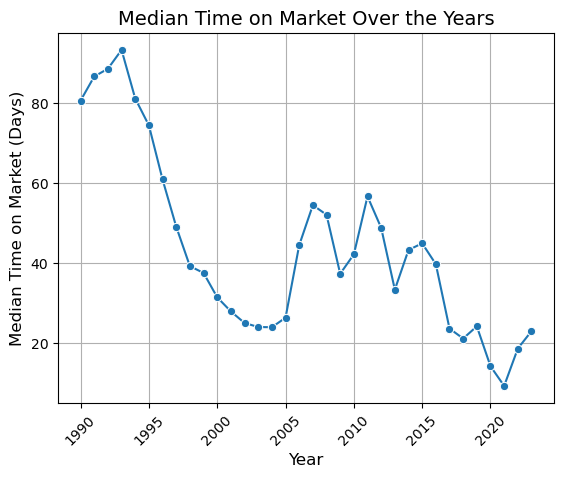

In [124]:
# create graph for median time on the market over the years
sns.lineplot(data=avgHousingData, x='Mon-Yr', y='Median Time on Market', marker = 'o')

plt.title('Median Time on Market Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Time on Market (Days)', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)

plt.savefig('./graphs/MedianTimeOnMarketOverTheYears.png', bbox_inches='tight')
plt.show()

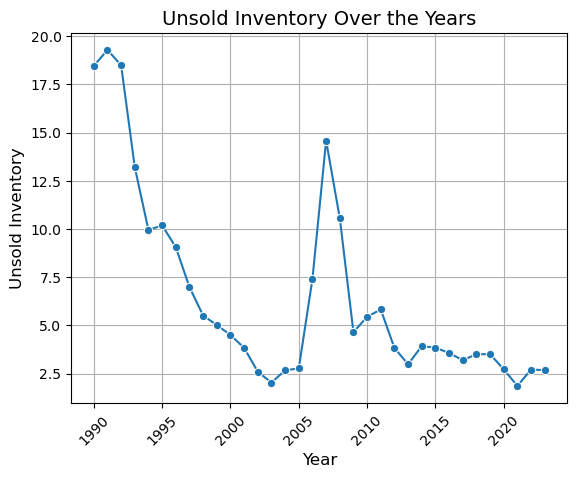

In [125]:
# create graph for unsold inventory over the years
sns.lineplot(data=avgHousingData, x='Mon-Yr', y='Unsold Inventory', marker = 'o')

plt.title('Unsold Inventory Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unsold Inventory', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)

plt.savefig('./graphs/UnsoldInventoryOverTheYears.png', bbox_inches='tight')
plt.show()

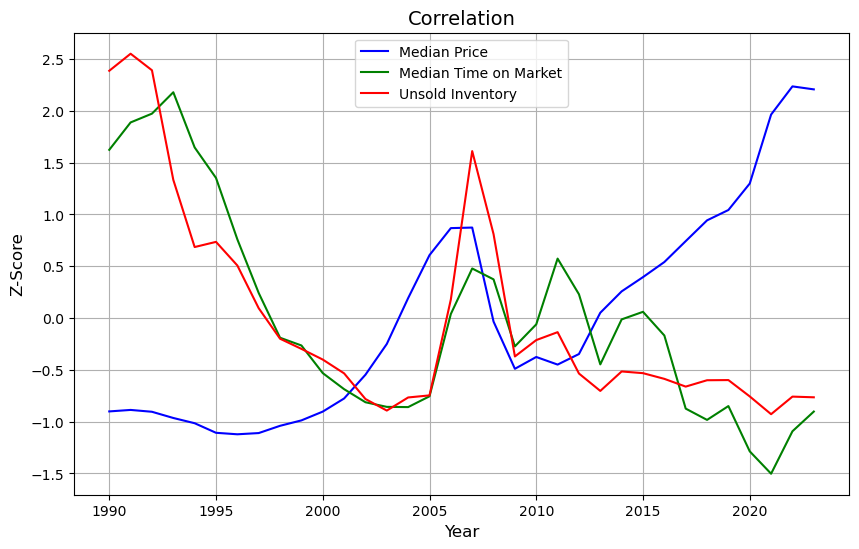

In [126]:
# create correlation graph 
columnsToScale = ['Median Price', 'Median Time on Market', 'Unsold Inventory']

# standardize using Z-score normalization
correlation = avgHousingData[columnsToScale].apply(lambda x: (x - x.mean()) / x.std())

# plot the standardized data
plt.figure(figsize=(10, 6))
sns.lineplot(data=correlation, x=correlation.index, y='Median Price', label='Median Price', color='blue')
sns.lineplot(data=correlation, x=correlation.index, y='Median Time on Market', label='Median Time on Market', color='green')
sns.lineplot(data=correlation, x=correlation.index, y='Unsold Inventory', label='Unsold Inventory', color='red')

plt.title('Correlation', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Z-Score', fontsize=12)
plt.grid(True)
plt.legend(loc = 'upper center')

plt.savefig('./graphs/Correlation', bbox_inches='tight')
plt.show()

In [127]:
# create df to plot years by months
df = pd.read_csv('./datasets/LAHousingData.csv')

# convert 'Mon-Yr' to datetime format
df['Date'] = pd.to_datetime(df['Mon-Yr'], format='%b-%y')
#df = df.set_index('Date')


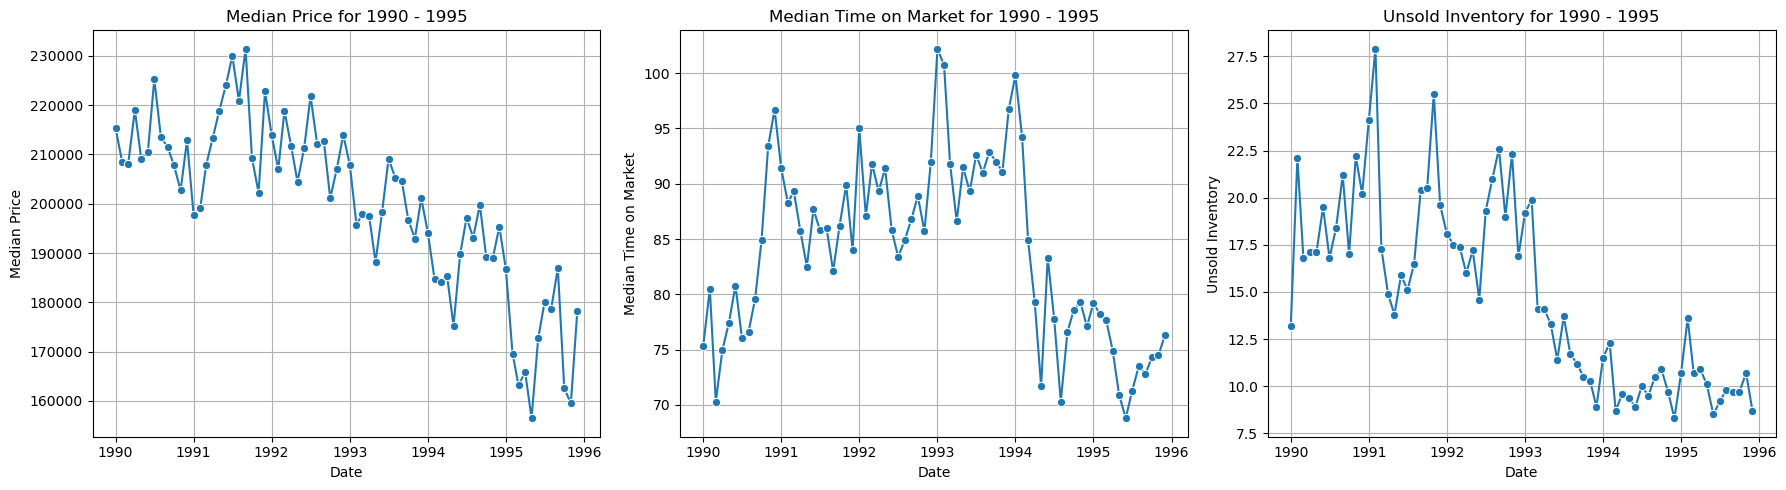

In [128]:
# closer look at 1990 - 1995
laRiots = df[df['Date'].dt.year.isin([1990, 1991, 1992, 1993, 1994, 1995])]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# median price
sns.lineplot(ax=axes[0], data=laRiots, x='Date', y='Median Price', marker='o')
axes[0].set_title('Median Price for 1990 - 1995')
axes[0].grid(True)

# median time on market
sns.lineplot(ax=axes[1], data=laRiots, x='Date', y='Median Time on Market', marker='o')
axes[1].set_title('Median Time on Market for 1990 - 1995')
axes[1].grid(True)

# unsold inventory
sns.lineplot(ax=axes[2], data=laRiots, x='Date', y='Unsold Inventory', marker='o')
axes[2].set_title('Unsold Inventory for 1990 - 1995')
axes[2].grid(True)

plt.tight_layout()
plt.savefig('./graphs/laRiotsGraphs')
plt.show()


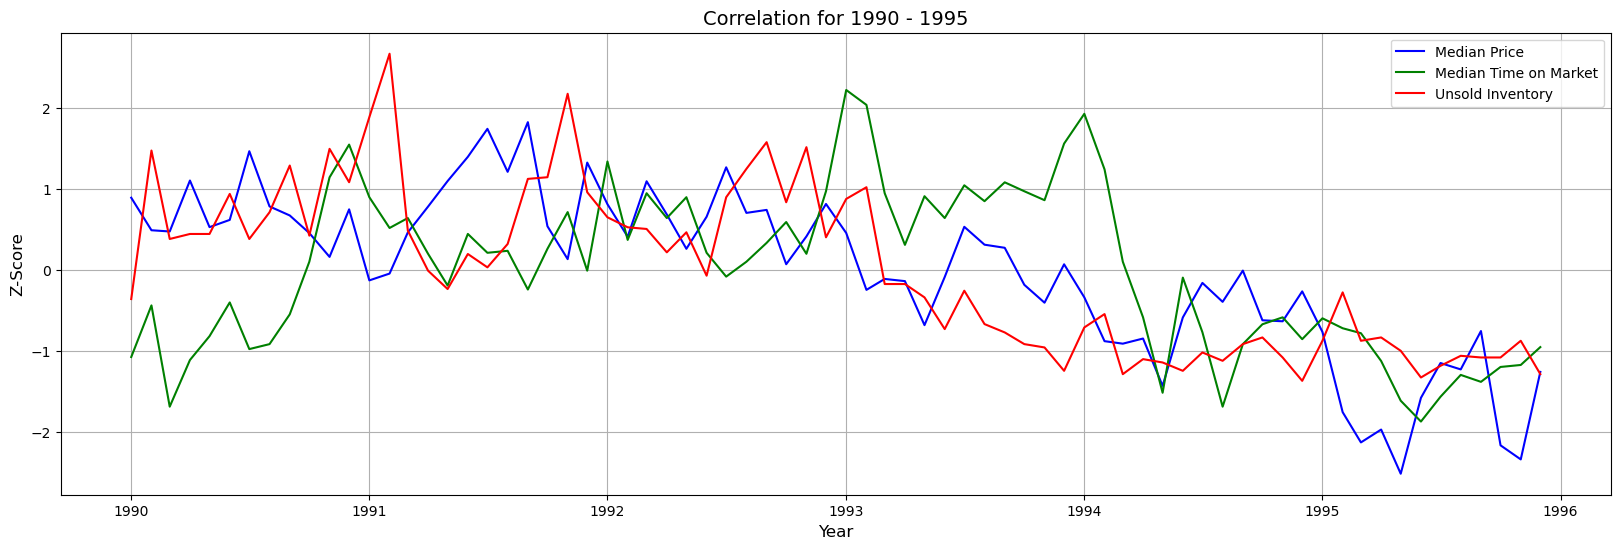

In [129]:
# correlation graph for 1990 - 1995
columnsToScale = ['Median Price', 'Median Time on Market', 'Unsold Inventory']

# standardize using Z-score normalization
laRiotsCorr = laRiots.copy()
laRiotsCorr[columnsToScale] = laRiotsCorr[columnsToScale].apply(lambda x: (x - x.mean()) / x.std())

#plot the standardized data
plt.figure(figsize=(20, 6))
sns.lineplot(data=laRiotsCorr, x='Date', y='Median Price', label='Median Price', color='blue')
sns.lineplot(data=laRiotsCorr, x='Date', y='Median Time on Market', label='Median Time on Market', color='green')
sns.lineplot(data=laRiotsCorr, x='Date', y='Unsold Inventory', label='Unsold Inventory', color='red')

plt.title('Correlation for 1990 - 1995', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Z-Score', fontsize=12)
plt.grid(True)
plt.legend(loc = 'upper right')

plt.savefig('./graphs/laRiotsCorr', bbox_inches='tight')
plt.show()


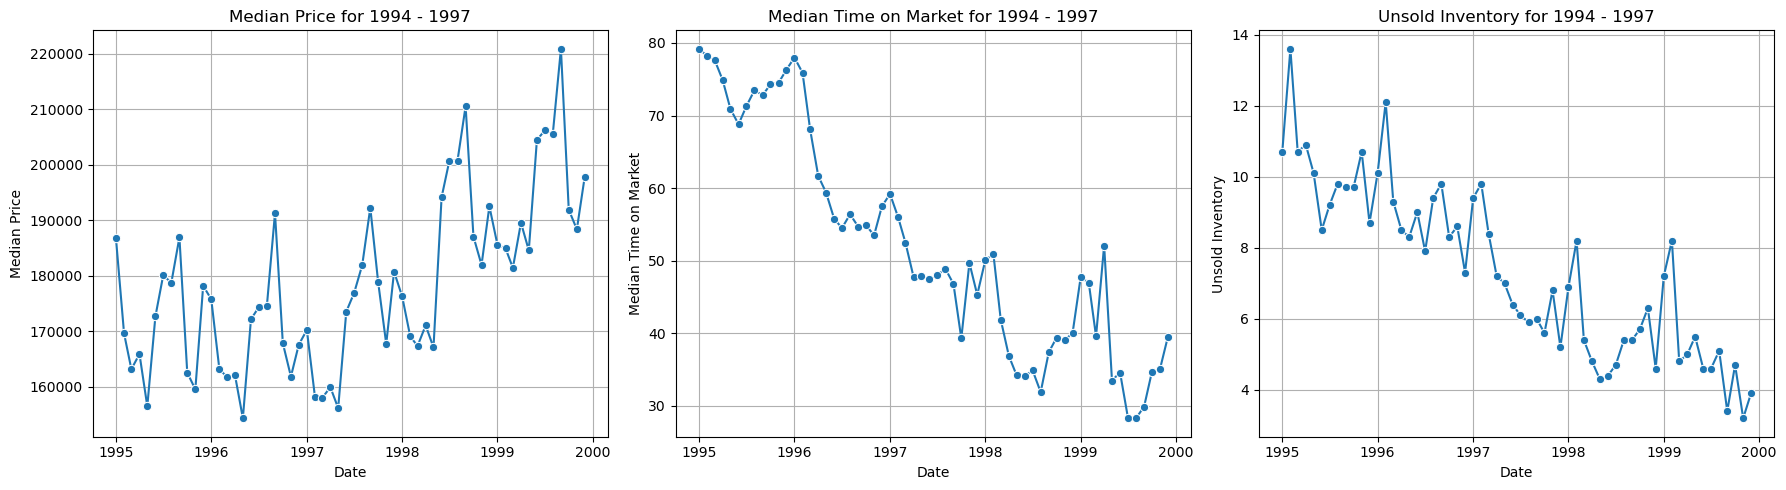

In [130]:
# closer look at 1995 - 1999
dotCom = df[df['Date'].dt.year.isin([1995, 1996, 1997, 1998, 1999])]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# median price
sns.lineplot(ax=axes[0], data=dotCom, x='Date', y='Median Price', marker='o')
axes[0].set_title('Median Price for 1994 - 1997')
axes[0].grid(True)

# median time on market
sns.lineplot(ax=axes[1], data=dotCom, x='Date', y='Median Time on Market', marker='o')
axes[1].set_title('Median Time on Market for 1994 - 1997')
axes[1].grid(True)

# unsold inventory
sns.lineplot(ax=axes[2], data=dotCom, x='Date', y='Unsold Inventory', marker='o')
axes[2].set_title('Unsold Inventory for 1994 - 1997')
axes[2].grid(True)

plt.tight_layout()
plt.savefig('./graphs/dotComGraphs')
plt.show()


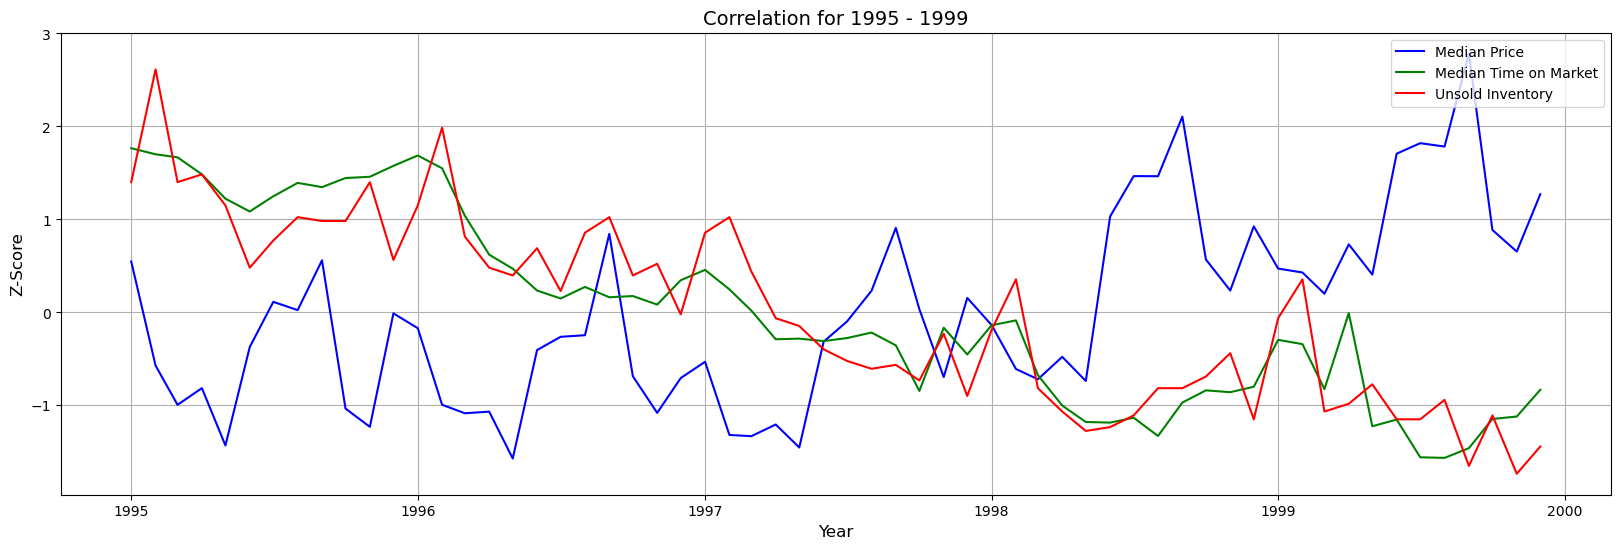

In [131]:
# correlation graph for 1995 - 1999
columnsToScale = ['Median Price', 'Median Time on Market', 'Unsold Inventory']

# standardize using Z-score normalization
dotComCorr = dotCom.copy()
dotComCorr[columnsToScale] = dotComCorr[columnsToScale].apply(lambda x: (x - x.mean()) / x.std())

#plot the standardized data
plt.figure(figsize=(20, 6))
sns.lineplot(data=dotComCorr, x='Date', y='Median Price', label='Median Price', color='blue')
sns.lineplot(data=dotComCorr, x='Date', y='Median Time on Market', label='Median Time on Market', color='green')
sns.lineplot(data=dotComCorr, x='Date', y='Unsold Inventory', label='Unsold Inventory', color='red')

plt.title('Correlation for 1995 - 1999', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Z-Score', fontsize=12)
plt.grid(True)
plt.legend(loc = 'upper right')

plt.savefig('./graphs/dotComCorr', bbox_inches='tight')
plt.show()

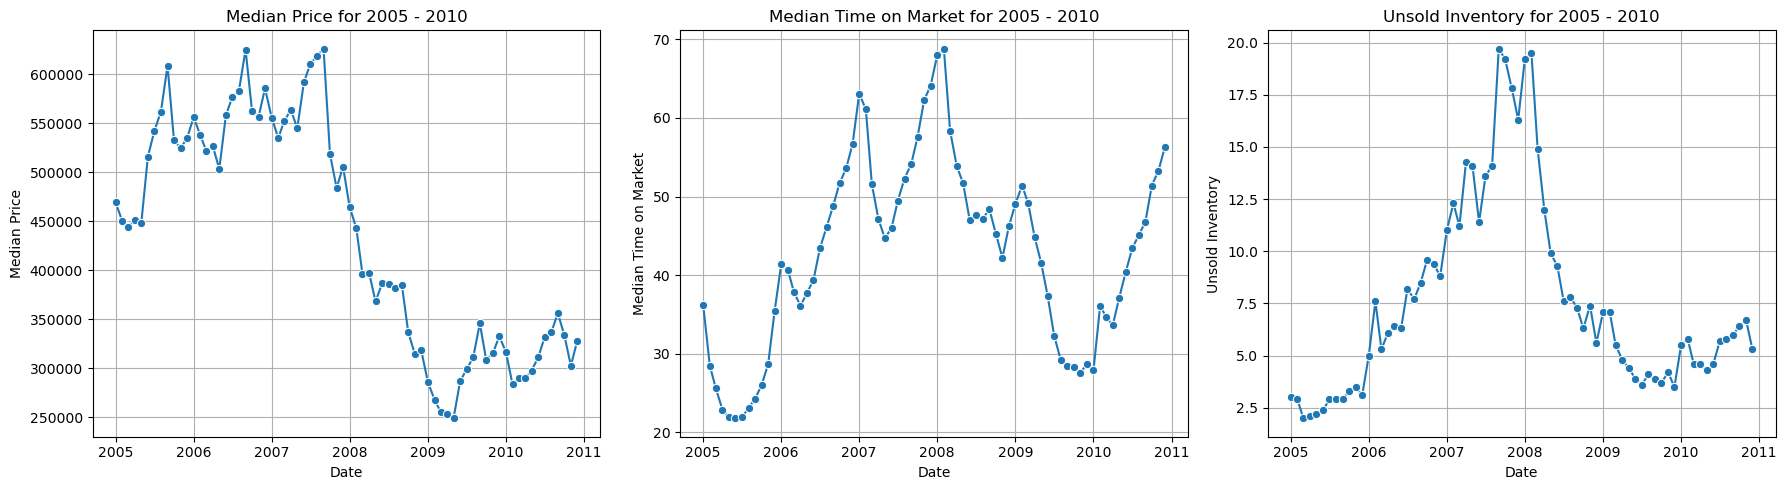

In [132]:
# closer look at 2005 - 2015
greatRec = df[df['Date'].dt.year.isin([2005, 2006, 2007, 2008, 2009, 2010])]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# median price
sns.lineplot(ax=axes[0], data=greatRec, x='Date', y='Median Price', marker='o')
axes[0].set_title('Median Price for 2005 - 2010')
axes[0].grid(True)

# median time on market
sns.lineplot(ax=axes[1], data=greatRec, x='Date', y='Median Time on Market', marker='o')
axes[1].set_title('Median Time on Market for 2005 - 2010')
axes[1].grid(True)

# unsold inventory
sns.lineplot(ax=axes[2], data=greatRec, x='Date', y='Unsold Inventory', marker='o')
axes[2].set_title('Unsold Inventory for 2005 - 2010')
axes[2].grid(True)

plt.tight_layout()
plt.savefig('./graphs/greatRecGraphs')
plt.show()


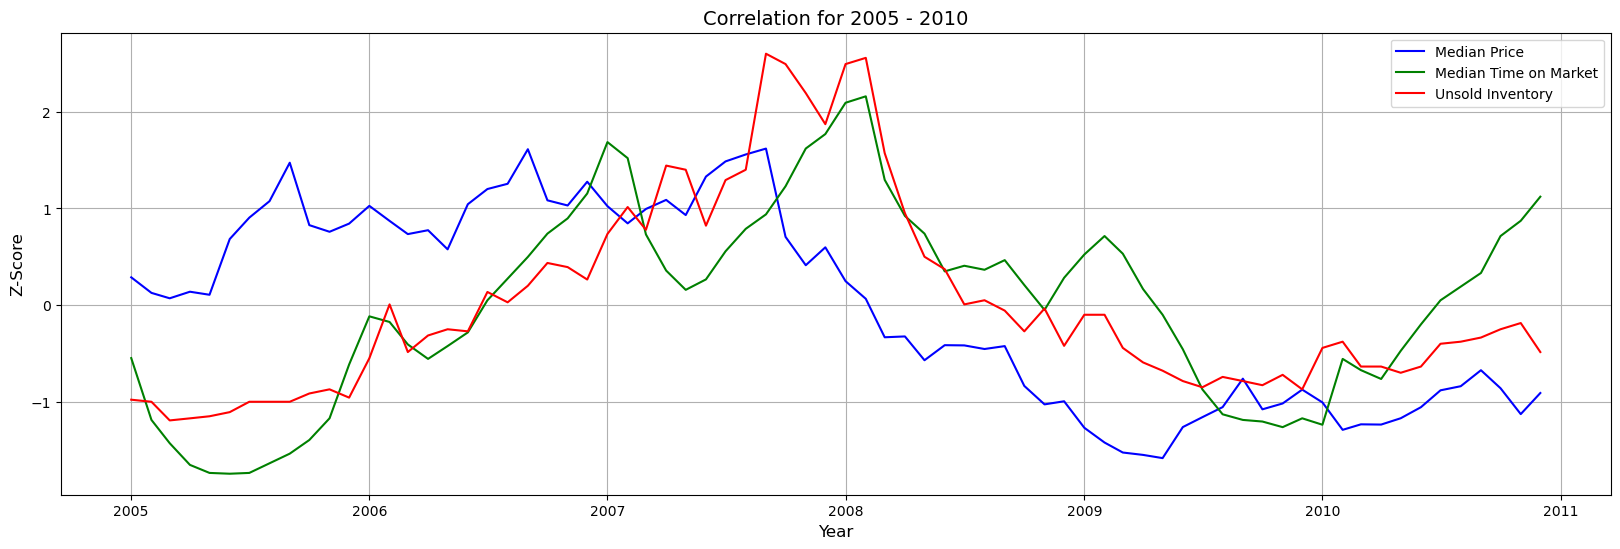

In [133]:
# correlation graph for 1995 - 1999
columnsToScale = ['Median Price', 'Median Time on Market', 'Unsold Inventory']

# standardize using Z-score normalization
greatRecCorr = greatRec.copy()
greatRecCorr[columnsToScale] = greatRecCorr[columnsToScale].apply(lambda x: (x - x.mean()) / x.std())

#plot the standardized data
plt.figure(figsize=(20, 6))
sns.lineplot(data=greatRecCorr, x='Date', y='Median Price', label='Median Price', color='blue')
sns.lineplot(data=greatRecCorr, x='Date', y='Median Time on Market', label='Median Time on Market', color='green')
sns.lineplot(data=greatRecCorr, x='Date', y='Unsold Inventory', label='Unsold Inventory', color='red')

plt.title('Correlation for 2005 - 2010', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Z-Score', fontsize=12)
plt.grid(True)
plt.legend(loc = 'upper right')

plt.savefig('./graphs/greatRecCorr', bbox_inches='tight')
plt.show()


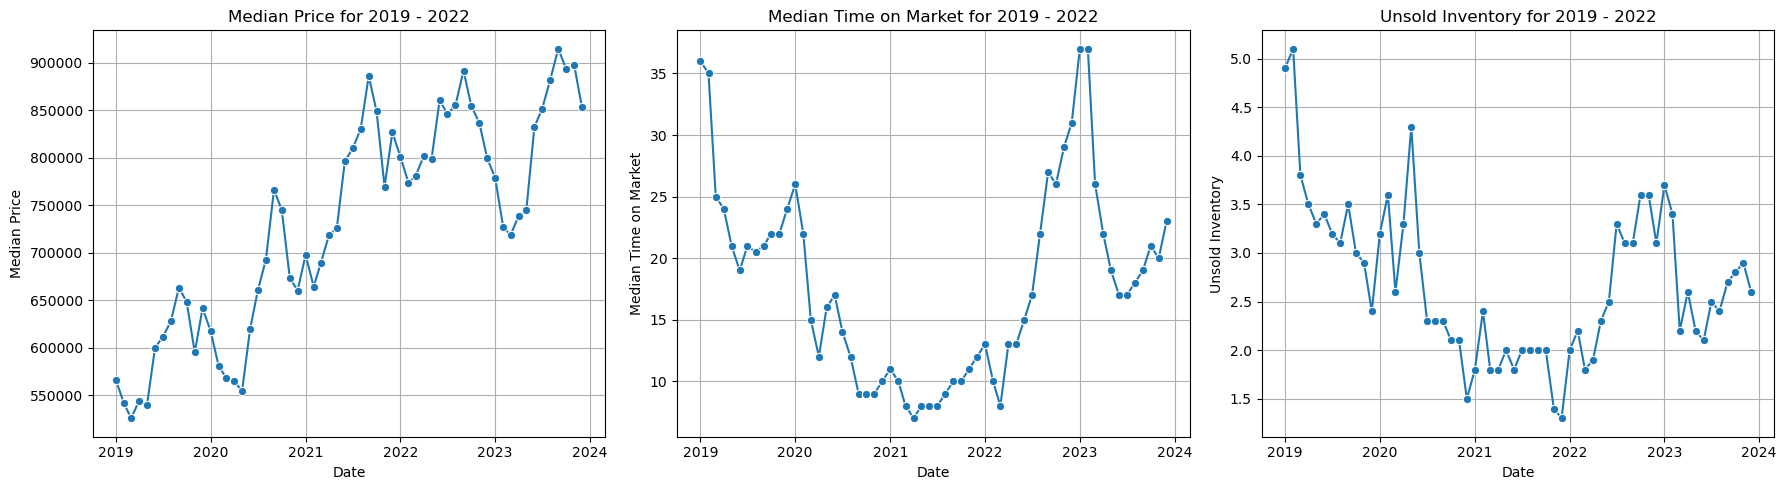

In [134]:
# closer look at 2019 - 2022
covid = df[df['Date'].dt.year.isin([2019, 2020, 2021, 2022, 2023])]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# median price
sns.lineplot(ax=axes[0], data=covid, x='Date', y='Median Price', marker='o')
axes[0].set_title('Median Price for 2019 - 2022')
axes[0].grid(True)

# median time on market
sns.lineplot(ax=axes[1], data=covid, x='Date', y='Median Time on Market', marker='o')
axes[1].set_title('Median Time on Market for 2019 - 2022')
axes[1].grid(True)

# unsold inventory
sns.lineplot(ax=axes[2], data=covid, x='Date', y='Unsold Inventory', marker='o')
axes[2].set_title('Unsold Inventory for 2019 - 2022')
axes[2].grid(True)

plt.tight_layout()
plt.savefig('./graphs/covidGraphs')
plt.show()

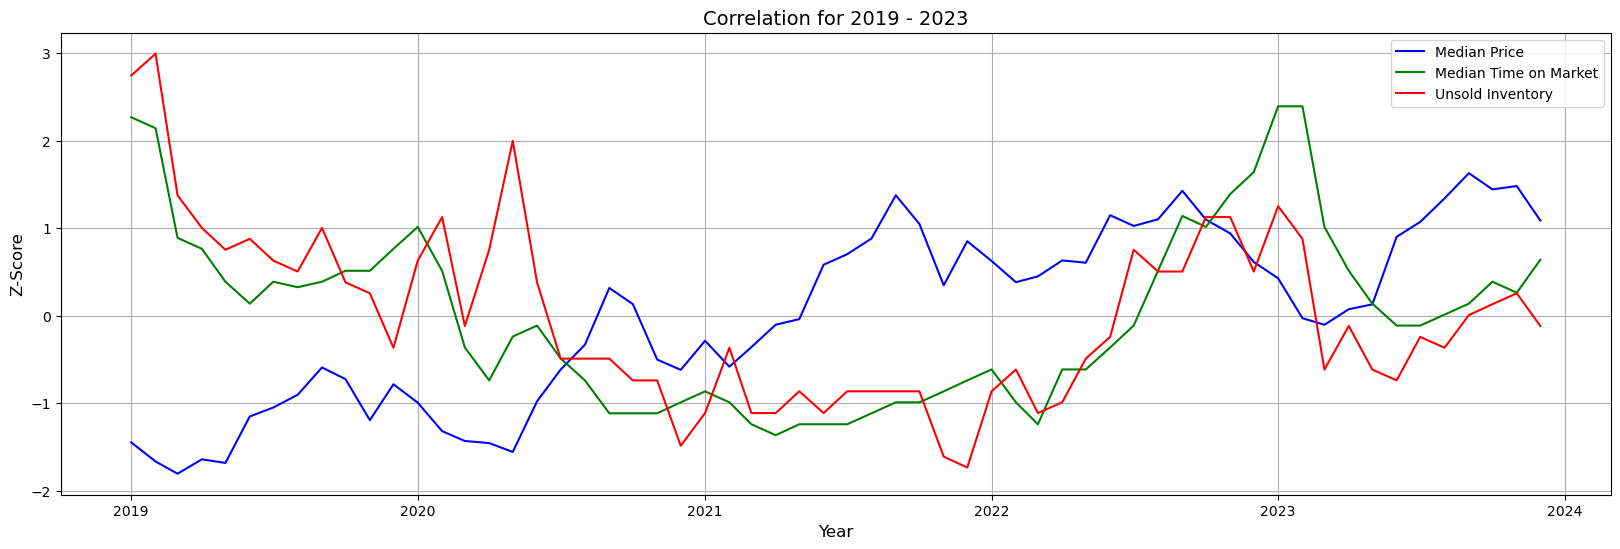

In [135]:
# correlation graph for 1995 - 1999
columnsToScale = ['Median Price', 'Median Time on Market', 'Unsold Inventory']

# standardize using Z-score normalization
covidCorr = covid.copy()
covidCorr[columnsToScale] = covidCorr[columnsToScale].apply(lambda x: (x - x.mean()) / x.std())

#plot the standardized data
plt.figure(figsize=(20, 6))
sns.lineplot(data=covidCorr, x='Date', y='Median Price', label='Median Price', color='blue')
sns.lineplot(data=covidCorr, x='Date', y='Median Time on Market', label='Median Time on Market', color='green')
sns.lineplot(data=covidCorr, x='Date', y='Unsold Inventory', label='Unsold Inventory', color='red')

plt.title('Correlation for 2019 - 2023', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Z-Score', fontsize=12)
plt.grid(True)
plt.legend(loc = 'upper right')

plt.savefig('./graphs/covidCorr', bbox_inches='tight')
plt.show()